<pre>
Copyright 2021-2022 Boris Shminke

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

   http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
</pre>

In [1]:
import nest_asyncio
from isabelle_client import start_isabelle_server

nest_asyncio.apply()
# on Windows one should start Isabelle server using Cygwin
# and paste `server_info` string here
server_info, _ = start_isabelle_server()

In [2]:
%%time
# to reproduce older results (obtained before this package was created)
# https://arxiv.org/abs/1901.01615
# notice that in general we follow the same pipeline as for checking
# lattice axioms independence in `lattice-indep.ipynb`
from residuated_binars.constants import (
    ASSOCIATIVITY,
    LEFT_DISTRIBUTIVITY,
    NON_TRIVIAL_DISTRIBUTIVITY_LAWS,
    RESIDUATED_BINAR,
)
from residuated_binars.use_nitpick import use_nitpick
from residuated_binars.utils import remove_dirs

MAX_CARDINALITY = 5
remove_dirs(("task*", "hyp*"))
use_nitpick(
    max_cardinality=MAX_CARDINALITY,
    independent_assumptions=NON_TRIVIAL_DISTRIBUTIVITY_LAWS,
    additional_assumptions=(
        RESIDUATED_BINAR +
        [
            ASSOCIATIVITY.replace("f(", "mult("),
            LEFT_DISTRIBUTIVITY.replace("f(", "meet(").replace("g(", "join(")
        ]
    ),
    check_subset_independence=True,
    server_info=server_info
)

CPU times: user 753 ms, sys: 148 ms, total: 900 ms
Wall time: 7min 10s


In [3]:
import os
from residuated_binars.parser import isabelle_response_to_algebra

MAX_CARDINALITY = 5
binars = []
for i in range(MAX_CARDINALITY + 1):
    try:
        binars += isabelle_response_to_algebra(
            os.path.join(".", f"task{i}", "isabelle.out")
        )
    except:
        pass

In [4]:
# maximal length of a label distinguishes the most general counter-example
max_label = max([len(binar.label) for binar in binars])
binars = [binar for binar in binars if len(binar.label) == max_label]
# we have 12 counter-examples, two per each A_1, A_2, ..., A_6
# from the paper
len(binars)

12

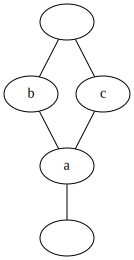

In [5]:
for binar in binars:
    binar.canonise_symbols()
binars[11].graphviz_repr

In [6]:
from IPython.display import Markdown

# it's important to notice that here we don't try to minimize the number of 
# different Hasse diagrams or Cayley tables, so all 12 binars are different
# some of them are isomorphic or have isomorphic lattice reducts
Markdown(binars[11].markdown_mult_table)

|*|⟘|a|b|c|⟙|
|-|-|-|-|-|-|
|**⟘**|⟘|⟘|⟘|⟘|⟘|
|**a**|⟘|⟘|⟘|⟘|⟘|
|**b**|⟘|⟘|b|⟘|b|
|**c**|⟘|⟘|⟘|c|c|
|**⟙**|⟘|⟘|b|c|⟙|


In [7]:
%%time
from residuated_binars.constants import BOUNDED_LATTICE, INVOLUTION
# to reproduce results obtained with this package
# https://arxiv.org/abs/2109.05264
# change `max_cardinality` to 10
# Attention! The computation might take a couple of days or weeks
# It's not recommended to run on a laptop

remove_dirs(("task*", "hyp*"))
use_nitpick(
    max_cardinality=2,
    independent_assumptions=NON_TRIVIAL_DISTRIBUTIVITY_LAWS,
    additional_assumptions=RESIDUATED_BINAR + BOUNDED_LATTICE + INVOLUTION,
    check_subset_independence=True,
    server_info=server_info
)

CPU times: user 249 ms, sys: 67.4 ms, total: 317 ms
Wall time: 49.2 s
